In [1]:
from sklearn.decomposition import FastICA
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt
import numpy as np
import pylab as pl
import glob
import cv2
import os

import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk

In [2]:
def compute_ica_output(image_list, no_of_components, max_iterations, tolerance):
    original_images = []
    kspace_images = []
    ica_images = []
    kspace_output = []
    for file in image_list:
        image_name = file
        input_image = cv2.imread(image_name, 0)
        original_images.append(input_image)
        input_image = np.fft.fft2(input_image)
        input_image = np.fft.fftshift(input_image)
        img = np.uint8(np.log(np.abs(input_image) + 1) * 10)
        kspace_images.append(img)

        img = np.fft.ifftshift(input_image)
        img = np.fft.ifft2(img)
        img = np.uint8(np.log(np.abs(img) + 1) * 10)

        ica = FastICA(n_components = no_of_components, max_iter = max_iterations, tol = tolerance)
        ica.fit(img)
        image_ica = ica.fit_transform(img)
        image_restored = ica.inverse_transform(image_ica)

        imagefcs = np.zeros((image_restored.shape[0], image_restored.shape[1]), np.float)
        for i in range(image_restored.shape[0]):
            for j in range(image_restored.shape[1]):
                imagefcs[i, j] = np.log(np.abs(image_restored[i, j]) * 10)
        ica_images.append(imagefcs)

        imagefcs = np.fft.fft2(imagefcs)
        imagefcs = np.fft.fftshift(imagefcs)
        output_kspace = np.uint8(np.log(np.abs(imagefcs) + 1) * 10)
        kspace_output.append(output_kspace)
    return original_images, kspace_images, ica_images, kspace_output

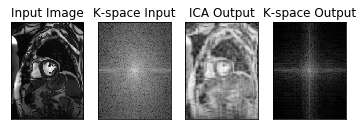

In [5]:
input_image_list = ['P10-0001.jpg']
original_images, kspace_images, ica_images, kspace_output = compute_ica_output(input_image_list, 15, 100000, 0.000001)

#img = None
#for f in input_image_list:
#    im=pl.imread(f)
#    if img is None:
#        img = pl.imshow(im)
#    else:
#        img.set_data(im)
#    pl.pause(1000)
#    pl.draw()

plt.subplot(141),plt.imshow(original_images[0], cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(kspace_images[0], cmap = 'gray')
plt.title('K-space Input'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(ica_images[0], cmap = 'gray')
plt.title('ICA Output'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(kspace_output[0], cmap = 'gray')
plt.title('K-space Output'), plt.xticks([]), plt.yticks([])

plt.show()